In [173]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snr

LOAD THE DATSET

In [174]:
df=pd.read_csv('/content/E_Commerce.csv')

In [175]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


CLEANING THE DATA

In [176]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [177]:
df.drop(['ID'],axis=1,inplace=True)

In [178]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [179]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [180]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [181]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [182]:
df['Warehouse_block']=df['Warehouse_block'].apply({'A':1,'B':2,'C':3,'D':4,'F':5}.get)
df['Mode_of_Shipment']=df['Mode_of_Shipment'].apply({'Flight':1,'Ship':2,'Road':3}.get)
df['Product_importance']=df['Product_importance'].apply({'low':1,'medium':2,'high':3}.get)
df['Gender']=df['Gender'].apply({'M':1,'F':2}.get)

In [183]:
df.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,1,4,2,177,3,1,2,44,1233,1
1,5,1,4,5,216,2,1,1,59,3088,1
2,1,1,2,2,183,4,1,1,48,3374,1
3,2,1,3,3,176,4,2,1,10,1177,1
4,3,1,2,2,184,3,2,2,46,2484,1
5,5,1,3,1,162,3,2,2,12,1417,1
6,4,1,3,4,250,3,1,2,3,2371,1
7,5,1,4,1,233,2,1,2,48,2804,1
8,1,1,3,4,150,3,1,2,11,1861,1
9,2,1,3,2,164,3,2,2,29,1187,1


DESCRIPTIVE STATISTICS

In [184]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,3.333394,1.998454,4.054459,2.990545,210.196836,3.567597,1.604600,1.504137,13.373216,3634.016729,0.596691
std,1.490726,0.567099,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,1.000000,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1.000000,1.000000,1001.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,169.000000,3.000000,1.000000,1.000000,4.000000,1839.500000,0.000000
50%,4.000000,2.000000,4.000000,3.000000,214.000000,3.000000,2.000000,2.000000,7.000000,4149.000000,1.000000
75%,5.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,2.000000,10.000000,5050.000000,1.000000
max,5.000000,3.000000,7.000000,5.000000,310.000000,10.000000,3.000000,2.000000,65.000000,7846.000000,1.000000


In [185]:
df.duplicated().sum()

0

DIVIDE THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLE

In [186]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,1,4,2,177,3,1,2,44,1233,1
1,5,1,4,5,216,2,1,1,59,3088,1
2,1,1,2,2,183,4,1,1,48,3374,1
3,2,1,3,3,176,4,2,1,10,1177,1
4,3,1,2,2,184,3,2,2,46,2484,1


In [187]:
x=df.iloc[:,:10]
y=df['Reached.on.Time_Y.N']

In [188]:
print(x)

       Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0                    4                 1                    4   
1                    5                 1                    4   
2                    1                 1                    2   
3                    2                 1                    3   
4                    3                 1                    2   
...                ...               ...                  ...   
10994                1                 2                    4   
10995                2                 2                    4   
10996                3                 2                    5   
10997                5                 2                    5   
10998                4                 2                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2     

TRAIN TEST SPLIT

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

ACTIVATING MODEL
1.KNN
2.RANDOM FOREST CLASSIFIER
3.DECISION TREE CLASSIFIER
4.LOGISTICS REGRESSION

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

USING KNN

In [191]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [192]:
predictions=knn.predict(x_test)

In [193]:
knn_score=knn.score(x_test,y_test)

USING RandomForestClassifier

In [194]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [195]:
rf_pred=rf.predict(x_test)

In [196]:
rf_score1=rf.score(x_test,y_test)

USING DECISION TREE CLLASIFIER

In [197]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [198]:
dt_pred=dt.predict(x_test)

In [199]:
dt_score=dt.score(x_test,y_test)

USING LOGISTICS REGRESSION

In [200]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [201]:
lr_pred=lr.predict(x_test)

In [202]:
lr_score=lr.score(x_test,y_test)

In [203]:
print(knn_score)
print(rf_score1)
print(dt_score)
print(lr_score)

0.6522727272727272
0.6718181818181819
0.6581818181818182
0.635


In [204]:
from sklearn.metrics import accuracy_score

<ipython-input-205-3ea072deb6dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snr.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')


Text(0, 0.5, 'Accuracy')

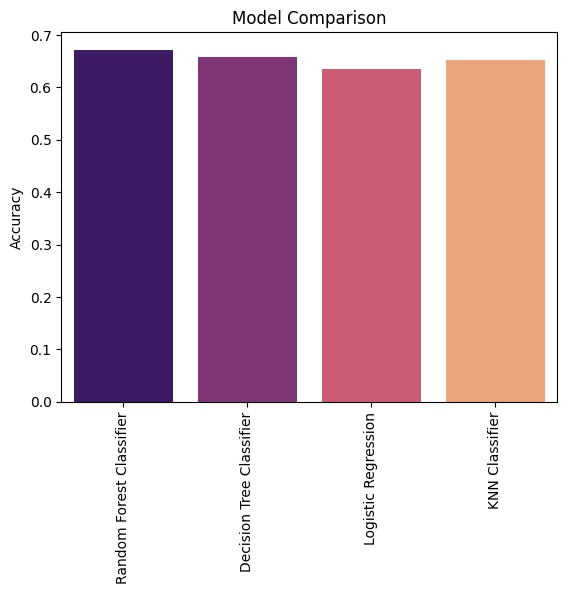

In [205]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test,predictions)]
snr.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')